In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import (
    confusion_matrix,
    classification_report, 
    ConfusionMatrixDisplay,
    accuracy_score,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    f1_score,
    precision_recall_fscore_support,
    average_precision_score
)
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

# Tree Visualisation
# from sklearn.tree import export_graphviz
# from IPython.display import Image
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split
sns.set()
import numpy as np
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
# from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
# from keras import initializers
# from tensorflow.keras.initializers import GlorotUniform, RandomNormal,RandomUniform 
# from keras.callbacks import ReduceLROnPlateau
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
# from tensorflow.keras.callbacks import EarlyStopping
# from keras.losses import SparseCategoricalCrossentropy
# from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
import pickle

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

2024-05-11 22:32:40.942370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


https://www.cdc.gov/nchs/data/dvs/FDEATH11-03finalACC.pdf

In [2]:
df = pd.read_csv('linkco2015usnum.csv',low_memory=False)
df

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_16,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,2,1,2,2015,1
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,1,2,2,2015,4
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,1,2,2015,1
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,1,2,7,2015,5
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,1,3,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,3,2,1,2016,1
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,3,1,6,2015,10
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,1,2,3,2016,2
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,1,7,2015,11


In [3]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}': {unique_values}")

Column 'laterec': [0]
Column 'dob_yy': [2015]
Column 'dob_mm': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Column 'dob_tt': [1504 1752 1222 ...  202  629  539]
Column 'dob_wk': [5 7 2 6 3 4 1]
Column 'bfacil': [1 4 5 6 2 7 3 0 9]
Column 'f_bfacil': [1 0 2]
Column 'bfacil3': [1 2 3]
Column 'mageimp': [1 2 3 4 5]
Column 'magerep': [1 2 3 4 5]
Column 'mager': [18 20 32 25 24 35 28 30 26 27 23 19 21 22 33 38 34 17 29 31 37 16 39 36
 40 15 43 44 42 41 46 47 50 45 49 14 48 13 12]
Column 'mager14': [ 6  8 10  9 11  7  5  4 12  3 13 14  1]
Column 'mager9': [2 3 5 4 6 7 8 9 1]
Column 'mbstate_rec': [1 2 3]
Column 'restatus': [1 2 3 4]
Column 'mrace31': [ 1  2 19  6  4  3 10  5 11 13 14 25 15  8 23 16 12 21  9  7 99 20 22 30
 28]
Column 'mrace6': [1 2 6 4 3 5 9]
Column 'mrace15': [ 1  2 15  9  5 10  3  7 13  6  8  4 14 12 11 99]
Column 'mbrace': [1 2 4 3]
Column 'mraceimp': [1 0 4 2 5 3 9]
Column 'mhisp_r': [5 0 1 4 2 9 3]
Column 'f_mhisp': [1 2 7 6 8 3 0 4 5]
Column 'mracehisp': [7 2 1 6 4 3 5 8]
Col

Column 'ager22': [ 6 14  1 15  2 12  8 13  3  4 11 10  7  5 16  9 18 22 17 19 21 20]
Column 'manner': ['7' '5' 'U' '4' '1' '3' 'B' 'C' 'D' 'O' 'R' 'E']
Column 'dispo': ['U' 'B' 'C' 'R' 'E' 'D' 'O']
Column 'autopsy': ['N' 'Y' 'U']
Column 'lace': ['P' 'Q' 'R' 'A' 'I' 'J' '0' 'D' 'V' '9' 'E' 'B' 'N' 'C' '8' 'K' 'G' '5'
 'Y' 'M' 'H' '2' 'L' '1' '4' 'F']
Column 'ucod': ['P369' 'Q249' 'Q602' 'R95' 'P280' 'Q213' 'P039' 'A090' 'R99' 'I678'
 'Q897' 'P072' 'Q913' 'J189' 'P549' 'P239' 'P018' 'Q789' 'W75' 'P011'
 'P522' 'D689' 'P293' 'Q245' 'A419' 'P220' 'J849' 'P77' 'J984' 'P021'
 'J690' 'Q000' 'P070' 'P271' 'P364' 'V892' 'P251' 'P010' 'P523' 'J840'
 'P269' 'Q893' 'Q042' 'Q614' 'P548' 'P209' 'P298' 'P291' 'Q336' 'Q043'
 'P543' 'P368' 'P073' 'P219' 'Q917' 'A391' 'P240' 'I272' 'P780' 'J80'
 'E872' 'Q211' 'P916' 'Q613' 'D899' 'Q771' 'Q248' 'Q212' 'B99' 'Q606'
 'P026' 'V874' 'P969' 'D761' 'E875' 'R092' 'R579' 'Y09' 'P362' 'Q790'
 'I469' 'P290' 'N19' 'A099' 'C919' 'P614' 'P352' 'P013' 'P529' 'I615'
 '

In [4]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 343 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    laterec      23357 non-null  int64  
 1    dob_yy       23357 non-null  int64  
 2    dob_mm       23357 non-null  int64  
 3    dob_tt       23357 non-null  int64  
 4    dob_wk       23357 non-null  int64  
 5    bfacil       23357 non-null  int64  
 6    f_bfacil     23357 non-null  int64  
 7    bfacil3      23357 non-null  int64  
 8    mageimp      23357 non-null  int64  
 9    magerep      23357 non-null  int64  
 10   mager        23357 non-null  int64  
 11   mager14      23357 non-null  int64  
 12   mager9       23357 non-null  int64  
 13   mbstate_rec  23357 non-null  int64  
 14   restatus     23357 non-null  int64  
 15   mrace31      23357 non-null  int64  
 16   mrace6       23357 non-null  int64  
 17   mrace15      23357 non-null  int64  
 18   mbrace       23357 non-n

In [5]:
#Transform the 'sex' column
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex']

0        1
1        0
2        1
3        0
4        1
        ..
23352    1
23353    1
23354    0
23355    1
23356    1
Name: sex, Length: 23357, dtype: int64

# CREATE DF WITH ONLY INT64 VALUES

In [6]:
df_int = df.select_dtypes(include='int64')
df_int

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_16,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,2,1,2,2015,1
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,1,2,2,2015,4
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,1,2,2015,1
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,1,2,7,2015,5
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,1,3,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,3,2,1,2016,1
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,3,1,6,2015,10
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,1,2,3,2016,2
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,1,7,2015,11


In [7]:
df_int['ucodr130copy'] = df_int['ucodr130']
df_int

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm,ucodr130copy
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,1,2,2015,1,106
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,2,2,2015,4,123
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,2,2015,1,127
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,2,7,2015,5,135
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,3,2015,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,2,1,2016,1,18
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,1,6,2015,10,96
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,2,3,2016,2,135
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,7,2015,11,90


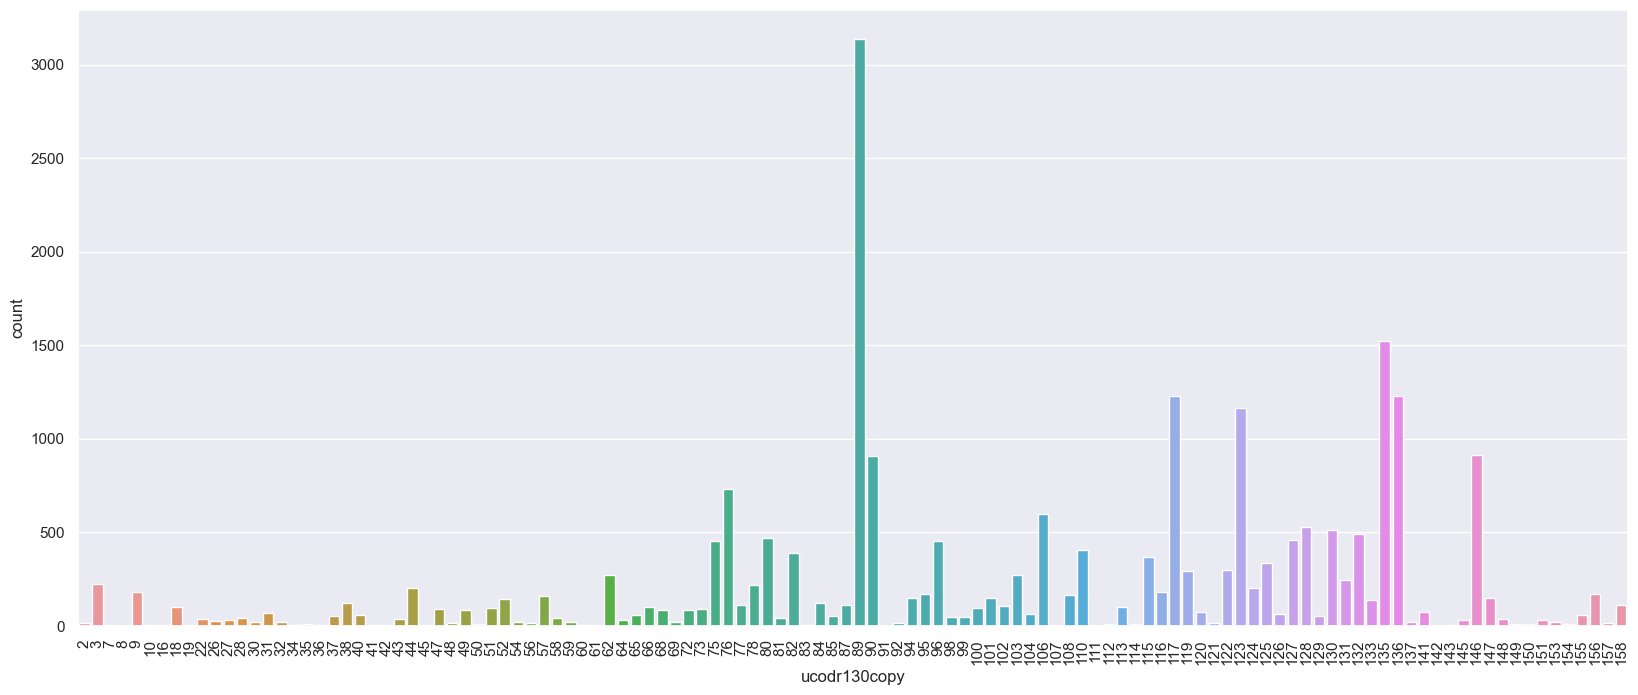

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(x='ucodr130copy',data=df_int)
plt.xticks(rotation=90)
plt.show()

In [9]:
df_int['ucodr130copy'].value_counts()

ucodr130copy
89     3137
135    1524
117    1229
136    1228
123    1163
       ... 
111       1
8         1
91        1
142       1
107       1
Name: count, Length: 118, dtype: int64

# CATEGORIZE CAUSES OF DEATH INTO 16 CLASSES FOR A BETTER MODEL

In [10]:
# df_int.loc[(df_int['ucodr130copy'] >= 2) & (df_int['ucodr130copy'] <= 22), 'ucodr130copy'] = 1
# df_int.loc[(df_int['ucodr130copy'] >= 24) & (df_int['ucodr130copy'] <= 28), 'ucodr130copy'] = 23
# df_int.loc[(df_int['ucodr130copy'] >= 30) & (df_int['ucodr130copy'] <= 32), 'ucodr130copy'] = 29
# df_int.loc[(df_int['ucodr130copy'] >= 34) & (df_int['ucodr130copy'] <= 38), 'ucodr130copy'] = 33
# df_int.loc[(df_int['ucodr130copy'] >= 40) & (df_int['ucodr130copy'] <= 44), 'ucodr130copy'] = 39
# df_int.loc[(df_int['ucodr130copy'] >= 47) & (df_int['ucodr130copy'] <= 52), 'ucodr130copy'] = 46
# df_int.loc[(df_int['ucodr130copy'] >= 54) & (df_int['ucodr130copy'] <= 62), 'ucodr130copy'] = 53
# df_int.loc[(df_int['ucodr130copy'] >= 64) & (df_int['ucodr130copy'] <= 66), 'ucodr130copy'] = 63
# df_int.loc[(df_int['ucodr130copy'] >= 68) & (df_int['ucodr130copy'] <= 69), 'ucodr130copy'] = 67
# df_int.loc[(df_int['ucodr130copy'] >= 71) & (df_int['ucodr130copy'] <= 108), 'ucodr130copy'] = 70
# df_int.loc[(df_int['ucodr130copy'] >= 110) & (df_int['ucodr130copy'] <= 117), 'ucodr130copy'] = 109
# df_int.loc[(df_int['ucodr130copy'] >= 119) & (df_int['ucodr130copy'] <= 133), 'ucodr130copy'] = 118
# df_int.loc[(df_int['ucodr130copy'] >= 135) & (df_int['ucodr130copy'] <= 137), 'ucodr130copy'] = 134
# df_int.loc[(df_int['ucodr130copy'] >= 139) & (df_int['ucodr130copy'] <= 157), 'ucodr130copy'] = 138

# df_int

In [11]:
df_int.loc[(df_int['ucodr130copy'] >= 1) & (df_int['ucodr130copy'] <= 22), 'ucodr130copy'] = 1
df_int.loc[(df_int['ucodr130copy'] >= 23) & (df_int['ucodr130copy'] <= 28), 'ucodr130copy'] = 23
df_int.loc[(df_int['ucodr130copy'] >= 29) & (df_int['ucodr130copy'] <= 32), 'ucodr130copy'] = 29
df_int.loc[(df_int['ucodr130copy'] >= 33) & (df_int['ucodr130copy'] <= 38), 'ucodr130copy'] = 33
df_int.loc[(df_int['ucodr130copy'] >= 39) & (df_int['ucodr130copy'] <= 44), 'ucodr130copy'] = 39
df_int.loc[(df_int['ucodr130copy'] >= 46) & (df_int['ucodr130copy'] <= 52), 'ucodr130copy'] = 46
df_int.loc[(df_int['ucodr130copy'] >= 53) & (df_int['ucodr130copy'] <= 62), 'ucodr130copy'] = 53
df_int.loc[(df_int['ucodr130copy'] >= 63) & (df_int['ucodr130copy'] <= 66), 'ucodr130copy'] = 63
df_int.loc[(df_int['ucodr130copy'] >= 67) & (df_int['ucodr130copy'] <= 69), 'ucodr130copy'] = 67
df_int.loc[(df_int['ucodr130copy'] >= 70) & (df_int['ucodr130copy'] <= 108), 'ucodr130copy'] = 70
df_int.loc[(df_int['ucodr130copy'] >= 109) & (df_int['ucodr130copy'] <= 117), 'ucodr130copy'] = 109
df_int.loc[(df_int['ucodr130copy'] >= 118) & (df_int['ucodr130copy'] <= 133), 'ucodr130copy'] = 118
df_int.loc[(df_int['ucodr130copy'] >= 134) & (df_int['ucodr130copy'] <= 137), 'ucodr130copy'] = 134
df_int.loc[(df_int['ucodr130copy'] >= 138) & (df_int['ucodr130copy'] <= 157), 'ucodr130copy'] = 138

df_int

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm,ucodr130copy
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,1,2,2015,1,70
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,2,2,2015,4,118
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,2,2015,1,118
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,2,7,2015,5,134
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,3,2015,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,2,1,2016,1,1
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,1,6,2015,10,70
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,2,3,2016,2,134
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,7,2015,11,70


In [12]:
# df_int['ucodr130copy'] = df_int['ucodr130copy'].map({1:0, 23:1, 29:2, 33:3, 39:4, 45:5, 46:6, 53:7, 63:8, 67:9, 70:10, 109:11, 118:12, 134:13, 138:14, 158:15})
# df_int['ucodr130copy']

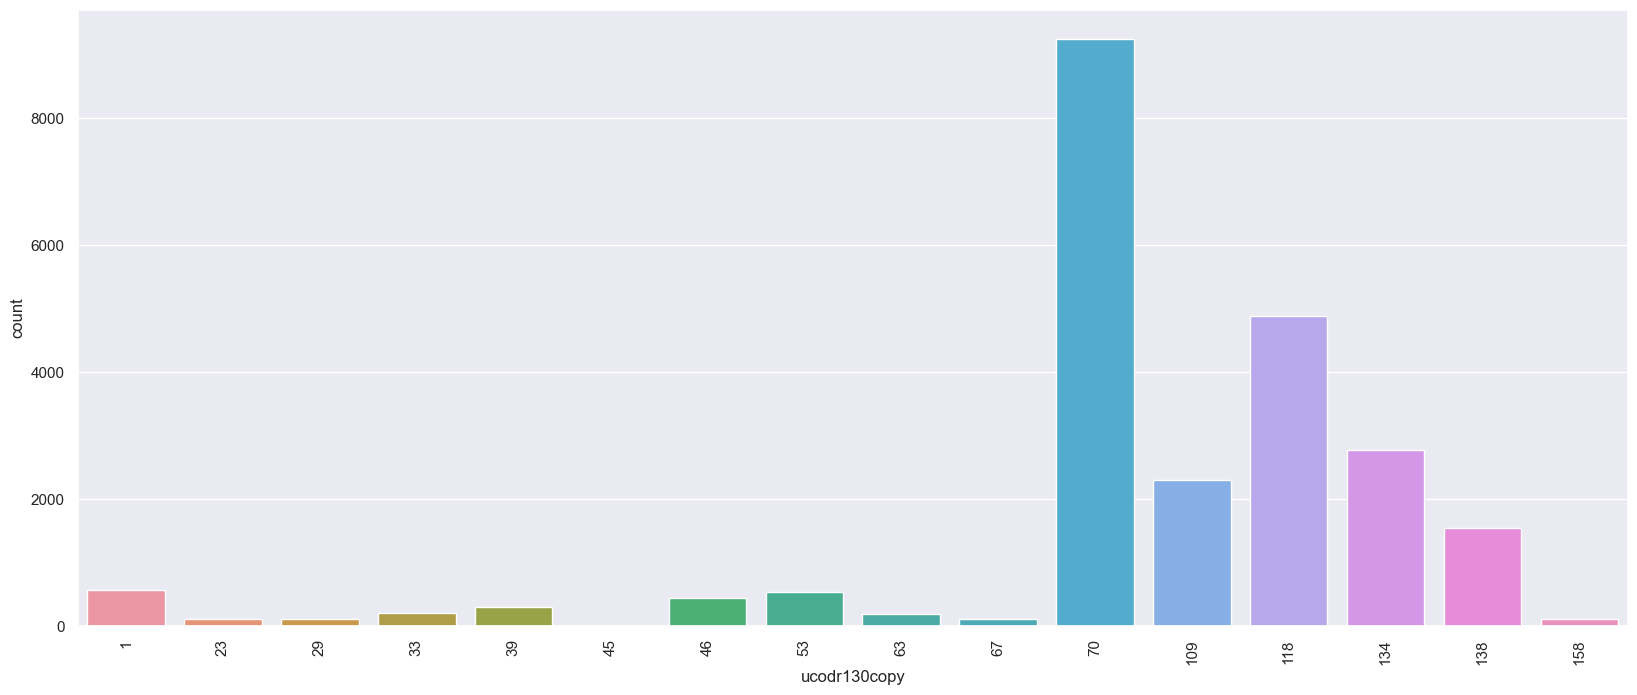

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x='ucodr130copy',data=df_int)
plt.xticks(rotation=90)
plt.show()

In [14]:
df_int['ucodr130copy'].value_counts()

ucodr130copy
70     9240
118    4873
134    2772
109    2296
138    1536
1       568
53      534
46      432
39      302
33      198
63      186
158     111
29      103
67      102
23      101
45        3
Name: count, dtype: int64

In [15]:
df_intx = df_int[
['brthwgt',#Imputed Birthwieght in grams
'aged',#Age at Death in Days
'oegest_r10',#Obstetric Estimate Recode10
'ranum',#Number of Record-Axis Conditions 
#'lmpused',#Computed (LMP) Gestation Used Flag 
'estrec10',#Combined Gestation Recode 10
'eanum',#Number of Entity-Axis Conditions
'apgar5r',#Five Minute APGAR Recode
'hospd',#Place of Death and Decendent’s Status
'ucodr130copy'#Selected Causes of Infant Death
]]

df_intx

,brthwgt,aged,oegest_r10,ranum,estrec10,eanum,apgar5r,hospd,ucodr130copy
0,1559,4,3,4,3,4,3,1,70
1,3288,93,5,3,5,3,4,2,118
2,2438,0,7,1,7,1,1,1,118
3,2920,141,7,2,7,2,4,2,134
4,580,0,2,2,2,3,1,1,70
...,...,...,...,...,...,...,...,...,...
23352,3317,100,7,3,7,3,4,2,1
23353,774,1,2,3,2,4,3,1,70
23354,3080,83,7,1,7,1,4,2,134
23355,2325,0,5,1,5,1,3,1,70


In [16]:
df['eanum'].value_counts()

eanum
1     7021
2     6257
3     4860
4     2719
5     1322
6      581
7      309
8      137
9       80
10      40
11      15
12      13
13       2
14       1
Name: count, dtype: int64

In [17]:
df['lmpused'].unique()

array([3, 2, 1, 4, 9])

entity axis codes refer to raw data put on death certificates and the record access axis codes refer to the codes cleaned by the NVSS.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7302107/

oegest_r10: Obstetric estimate of gestation at delivery
    
The best obstetric estimate of the infant’s gestational age (OE) in completed weeks is based on the clinician’s final estimate of gestation.

01 Under 20 weeks

02 20-27 weeks

03 28-31 weeks

04 32-33 weeks

05 34-36 weeks

06 37-38 weeks

07 39 weeks

08 40 weeks

09 41 weeks

10 42 weeks and over

99 Unknown

ranum: Number of Record-Axis Conditions 

record axis codes are assigned in terms of
the set of codes that best describe the overall medical certification portion of the death certificate. 

00-20 Code range

LMPUSED: Computed (LMP-Last Menstrual Period) Gestation Used Flag 

'estrec10',#Combined Gestation Recode 10

01 Under 20 weeks
02 20-27 weeks
03 28-31 weeks
04 32-33 weeks
05 34-36 weeks
06 37-38 weeks
07 39 weeks
08 40 weeks
09 41 weeks
10 42 weeks and over
99 Unknown

'eanum',#Number of Entity-Axis Conditions

entity axis codes represent what is actually written on the death certificate by the certifier expressed in terms of ICD codes including an indicator of which line the code came from and which position on the line it came from (if more than one code was listed per line).

'apgar5r',#Five Minute APGAR Recode

Apgar is a quick test performed on a baby at 1 and 5 minutes after birth. The 1-minute score determines how well the baby tolerated the birthing process. The 5-minute score tells the health care provider how well the baby is doing outside the mother's womb.

Five Minute APGAR Recode

1 A score of 0-3
2 A score of 4-6
 3 A score of 7-8
 4 A score of 9-10
 5 Unknown or not stated

'hospd',#Place of Death and Decendent’s Status

1 Hospital, clinic or Medical Center – Inpatient
2 Hospital, clinic or Medical Center – Outpatient or admitted
to Emergency Room
3 Hospital, clinic or Medical Center – Dead on Arrival
4 Decedent’s home
5 Hospice facility
6 Nursing home/long term care
7 Other
9 Place of death unknown

In [18]:
# # df_intx['brthwgt'] = df_intx['brthwgt']/1000
# df_intx.loc[:, 'brthwgt'] = df_intx.loc[:, 'brthwgt'] / 1000
# df_intx

In [19]:
#Rename Column Names
pd.options.mode.chained_assignment = None  # default='warn'-->This removes the warning

#df_shortened = df_intx.copy()

df_intx.rename(columns={
'brthwgt':'Birthweight (grams)',
'aged': 'Age at Death (days)',
'oegest_r10':'Obstetric Estimate',
'ranum':'Number of Record-Axis Conditions', 
'estrec10':'Combined Gestation',
'eanum':'Number of Entity-Axis Conditions',
'apgar5r':'Five Minute APGAR',
'hospd':'Place of Death and Descendent’s Status',
'ucodr130copy':'Selected Causes of Infant Death'
},inplace=True)

df_intx

,Birthweight (grams),Age at Death (days),Obstetric Estimate,Number of Record-Axis Conditions,Combined Gestation,Number of Entity-Axis Conditions,Five Minute APGAR,Place of Death and Descendent’s Status,Selected Causes of Infant Death
0,1559,4,3,4,3,4,3,1,70
1,3288,93,5,3,5,3,4,2,118
2,2438,0,7,1,7,1,1,1,118
3,2920,141,7,2,7,2,4,2,134
4,580,0,2,2,2,3,1,1,70
...,...,...,...,...,...,...,...,...,...
23352,3317,100,7,3,7,3,4,2,1
23353,774,1,2,3,2,4,3,1,70
23354,3080,83,7,1,7,1,4,2,134
23355,2325,0,5,1,5,1,3,1,70


In [20]:
df_intx['Combined Gestation'].value_counts()

Combined Gestation
2     8895
6     2950
7     2366
5     2301
3     1874
8     1310
1     1298
4      984
9      635
10     540
99     204
Name: count, dtype: int64

In [21]:
df_intx['Obstetric Estimate'] = df_intx['Obstetric Estimate'].replace(99, 11)
df_intx['Combined Gestation'] = df_intx['Combined Gestation'].replace(99, 11)
df_intx['Place of Death and Descendent’s Status'] = df_intx['Place of Death and Descendent’s Status'].replace(9, 8)

In [64]:
X = df_intx.drop('Selected Causes of Infant Death',axis=1)
y = df_intx['Selected Causes of Infant Death']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

rf = RandomForestClassifier(
    bootstrap= False, criterion= 'gini', max_depth= 20, max_features= 'log2', 
    min_samples_leaf= 2, min_samples_split= 10, n_estimators= 100,random_state=42)
gbc = GradientBoostingClassifier(
    criterion= 'squared_error', learning_rate= 0.1, loss= 'log_loss', max_depth= 5, 
    max_features= 'log2', min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 100, 
    subsample= 1.0,random_state=42)

ensemble = VotingClassifier(estimators=[('rf', rf),('gbc',gbc)], voting='soft')

ensemble.fit(X_train.values, y_train)

y_pred = ensemble.predict(X_test.values)
y_pred_train = ensemble.predict(X_train.values)

print(classification_report(y_test, y_pred))
print("Accuracy on training set: {:.4f}".format(ensemble.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(ensemble.score(X_test, y_test)))
print("Precision on training set:",precision_recall_fscore_support(y_train, y_pred_train, average='weighted')[0])
print("Precision on test set:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[0])
print("Recall on training set:",precision_recall_fscore_support(y_train, y_pred_train, average='weighted')[1])
print("Recall on test set:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[1])

              precision    recall  f1-score   support

           1       0.49      0.44      0.46       140
          23       0.00      0.00      0.00        30
          29       0.00      0.00      0.00        30
          33       0.00      0.00      0.00        53
          39       0.00      0.00      0.00        70
          46       0.00      0.00      0.00       109
          53       0.42      0.22      0.29       120
          63       0.00      0.00      0.00        43
          67       0.00      0.00      0.00        31
          70       0.77      0.87      0.82      2323
         109       0.49      0.15      0.23       569
         118       0.57      0.74      0.64      1199
         134       0.81      0.85      0.83       702
         138       0.55      0.81      0.65       390
         158       0.00      0.00      0.00        31

    accuracy                           0.68      5840
   macro avg       0.27      0.27      0.26      5840
weighted avg       0.63   

In [23]:
#Trying to predict a new patient
S = np.array([[1559,4,3,4,3,4,3,1]])#70
y_S = ensemble.predict(S)
y_S

array([70])

In [24]:
y_pro = ensemble.predict_proba(S)
y_pro[:,0]

array([0.00169291])

In [25]:
y_pro[:,9]

array([0.00087659])

In [26]:
predicted_probabilities = ensemble.predict_proba(S)
top3_predictions = []
for probs in predicted_probabilities:
    # Get indices of top 3 probabilities
    top3_indices = probs.argsort()[-3:][::-1]
    # Get corresponding class labels and probabilities
    top3_classes = ensemble.classes_[top3_indices]
    top3_probs = probs[top3_indices]*100# Convert probabilities to percentages
    top3_predictions.append(list(zip(top3_classes, top3_probs)))

# Print the top 3 predictions and their probabilities
for i, preds in enumerate(top3_predictions):
    print(f"Top 3 predictions for sample {i + 1}:")
    for j, (pred_class, pred_prob) in enumerate(preds):
        print(f"   Prediction {j + 1}: Class {pred_class}, Probability {pred_prob:.4f}%")

Top 3 predictions for sample 1:
   Prediction 1: Class 70, Probability 45.5489%
   Prediction 2: Class 118, Probability 26.5709%
   Prediction 3: Class 109, Probability 20.6366%


In [27]:
#https://stackoverflow.com/questions/49687304/finding-the-top-three-relevant-category-and-its-corresponding-probabilities
#https://stackoverflow.com/questions/63123025/randomforestclassifier-get-top-n-predictions-and-respective-probabilities
#https://stackoverflow.com/questions/64773162/top-3-classes-in-predict-proba

def top_3_predictions(new_data):
    predicted_probabilities = ensemble.predict_proba(new_data)
    top3_predictions = []
    for probs in predicted_probabilities:
        # Get indices of top 3 probabilities
        top3_indices = probs.argsort()[-3:][::-1]
        # Get corresponding class labels and probabilities
        top3_classes = ensemble.classes_[top3_indices]
        top3_probs = probs[top3_indices]*100# Convert probabilities to percentages
        top3_predictions.append(list(zip(top3_classes, top3_probs)))

    # Print the top 3 predictions and their probabilities
    for i, preds in enumerate(top3_predictions):
        print(f"Top 3 predictions for sample {new_data}:")
        for j, (pred_class, pred_prob) in enumerate(preds):
            print(f"   Prediction {j + 1}: Class {pred_class}, Probability {pred_prob:.2f}%")

In [28]:
D = np.array([[2325,0,5,1,5,1,3,1]])#70
y_D = ensemble.predict(D)
y_D

array([118])

In [29]:
top_3_predictions(D)

Top 3 predictions for sample [[2325    0    5    1    5    1    3    1]]:
   Prediction 1: Class 118, Probability 79.00%
   Prediction 2: Class 70, Probability 9.67%
   Prediction 3: Class 67, Probability 4.37%


In [30]:
E = np.array([[3011,127,6,2,6,2,4,1]])#134
y_E = ensemble.predict(E)
y_E

array([138])

In [31]:
F = np.array([[3288,93,5,3,5,3,4,2]])#118
y_F = ensemble.predict(F)
y_F

array([138])

In [32]:
G = np.array([[2438,0,7,1,7,1,1,1]])#118
y_G = ensemble.predict(G)
y_G

array([118])

In [33]:
H = np.array([[580,0,2,2,2,3,1,1]])#70
y_H = ensemble.predict(H)
y_H

array([70])

In [34]:
I = np.array([[3080,83,7,1,7,1,4,2]])#134
y_I = ensemble.predict(I)
y_I

array([134])

In [35]:
X = np.array([[774,1,2,3,2,4,3,1]])#70
y = ensemble.predict(X)
y

array([70])

## SAME MODEL BUT TRAIN ON ENTIRE DATASET

In [65]:
X = df_intx.drop('Selected Causes of Infant Death',axis=1)
y = df_intx['Selected Causes of Infant Death']

rf = RandomForestClassifier(
    bootstrap= False, criterion= 'gini', max_depth= 20, max_features= 'log2', 
    min_samples_leaf= 2, min_samples_split= 10, n_estimators= 100,random_state=42)
gbc = GradientBoostingClassifier(
    criterion= 'squared_error', learning_rate= 0.1, loss= 'log_loss', max_depth= 5, 
    max_features= 'log2', min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 100, 
    subsample= 1.0,random_state=42)

ensemble1 = VotingClassifier(estimators=[('rf', rf),('gbc',gbc)], voting='soft')

ensemble1.fit(X.values, y)

y_pred = ensemble1.predict(X.values)

print(f'Accuracy score for Test: {accuracy_score(y, y_pred)}')
print("Precision:",precision_recall_fscore_support(y, y_pred, average='weighted')[0])
print("Recall:",precision_recall_fscore_support(y, y_pred, average='weighted')[1])

Accuracy score for Test: 0.756689643361733
Precision: 0.7667184382564824
Recall: 0.756689643361733


In [66]:
# Saving model to pickle file
with open("ensemble1.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pickle.dump(ensemble1, file) # Dump function is used to write the object into the created file in byte format.

In [67]:
# Opening saved model
with open("ensemble1.pkl", "rb") as file:
    loaded_ensemble1 = pickle.load(file)

In [42]:
def top_3_predictions_loaded(new_data):
    predicted_probabilities = loaded_ensemble1.predict_proba(new_data)
    top3_predictions = []
    for probs in predicted_probabilities:
        # Get indices of top 3 probabilities
        top3_indices = probs.argsort()[-3:][::-1]
        # Get corresponding class labels and probabilities
        top3_classes = loaded_ensemble1.classes_[top3_indices]
        top3_probs = probs[top3_indices]*100# Convert probabilities to percentages
        top3_predictions.append(list(zip(top3_classes, top3_probs)))

    # Print the top 3 predictions and their probabilities
    for i, preds in enumerate(top3_predictions):
        print(f"Top 3 predictions for sample {new_data}:")
        for j, (pred_class, pred_prob) in enumerate(preds):
            print(f"   Prediction {j + 1}: Class {pred_class}, Probability {pred_prob:.2f}%")

In [68]:
def top_3_predictions(new_data):
    predicted_probabilities = loaded_ensemble1.predict_proba(new_data)
    top_3_predictions_list = []
    
    for i, probs in enumerate(predicted_probabilities):
        # Get indices of top 3 probabilities
        top3_indices = probs.argsort()[-3:][::-1]
        # Get corresponding class labels and probabilities
        top3_classes = loaded_ensemble1.classes_[top3_indices]
        top3_probs = probs[top3_indices] * 100  # Convert probabilities to percentages
        
        # Convert integer predictions to strings using the mapping
        top3_classes_strings = predictions_to_strings(top3_classes)
        
        # Store predictions for each sample
        predictions_for_sample = []
        for j, (pred_class, pred_class_string, pred_prob) in enumerate(zip(top3_classes, top3_classes_strings, top3_probs)):
            predictions_for_sample.append((pred_class_string, pred_prob))
        
        top_3_predictions_list.append(predictions_for_sample)
    
    return top_3_predictions_list

In [43]:
print(loaded_ensemble1.predict(np.array([[1559,4,3,4,3,4,3,1]])))

[70]


In [44]:
#S = [[1559,4,3,4,3,4,3,1]]
top_3_predictions_loaded(np.array([[1559,4,3,4,3,4,3,1]]))

Top 3 predictions for sample [[1559    4    3    4    3    4    3    1]]:
   Prediction 1: Class 70, Probability 45.23%
   Prediction 2: Class 118, Probability 24.42%
   Prediction 3: Class 109, Probability 22.21%


In [69]:
top_3_predictions(S)

[[('Certain conditions originating in the perinatal period',
   45.230458118919984),
  ('Congenital malformations, deformations and chromosomal abnormalities',
   24.415397898896135),
  ('Hemorrhagic and hematological disorders of newborn', 22.209654400431514)]]

In [87]:
def top_3_predictions1(new_data):
    predicted_probabilities = loaded_ensemble1.predict_proba(new_data)
    output = ""
    
    for i, probs in enumerate(predicted_probabilities):
        # Get indices of top 3 probabilities
        top3_indices = probs.argsort()[-3:][::-1]
        # Get corresponding class labels and probabilities
        top3_classes = loaded_ensemble1.classes_[top3_indices]
        top3_probs = probs[top3_indices] * 100  # Convert probabilities to percentages
        
        # Convert integer predictions to strings using the mapping
        top3_classes_strings = predictions_to_strings(top3_classes)
        
        # Print predictions for each sample
        print(f"Top 3 predictions for Sample {i+1}:")
        for j, (pred_class, pred_class_string, pred_prob) in enumerate(zip(top3_classes, top3_classes_strings, top3_probs)):
            print(f"   Prediction {j + 1}: Class {pred_class_string}, Probability {pred_prob:.2f}%")
        
        # Add predictions for each sample to the output
        output += f"Top 3 predictions for Sample {i+1}:\n"
        for j, (pred_class, pred_class_string, pred_prob) in enumerate(zip(top3_classes, top3_classes_strings, top3_probs)):
            output += f"   Prediction {j + 1}: Class {pred_class_string}, Probability {pred_prob:.2f}%\n"
        output += '\n'  # Add a newline after each sample's predictions
    
    return output


In [88]:
top_3_predictions1(S)

Top 3 predictions for Sample 1:
   Prediction 1: Class Certain conditions originating in the perinatal period, Probability 45.23%
   Prediction 2: Class Congenital malformations, deformations and chromosomal abnormalities, Probability 24.42%
   Prediction 3: Class Hemorrhagic and hematological disorders of newborn, Probability 22.21%


'Top 3 predictions for Sample 1:\n   Prediction 1: Class Certain conditions originating in the perinatal period, Probability 45.23%\n   Prediction 2: Class Congenital malformations, deformations and chromosomal abnormalities, Probability 24.42%\n   Prediction 3: Class Hemorrhagic and hematological disorders of newborn, Probability 22.21%\n\n'

In [45]:
#Trying to predict a new patient
S = np.array([[1559,4,3,4,3,4,3,1]])#70
y_S = loaded_ensemble1.predict(S)
y_S

array([70])

In [46]:
print(f"The Most Probable Cause of infant death is {y_S}")

The Most Probable Cause of infant death is [70]


In [47]:
D = np.array([[2325,0,5,1,5,1,3,1]])#70
y_D = loaded_ensemble1.predict(D)
y_D

array([118])

In [48]:
E = np.array([[3011,127,6,2,6,2,4,1]])#134
y_E = loaded_ensemble1.predict(E)
y_E

array([138])

In [49]:
F = np.array([[3288,93,5,3,5,3,4,2]])#118
y_F = loaded_ensemble1.predict(F)
y_F

array([138])

In [50]:
G = np.array([[2438,0,7,1,7,1,1,1]])#118
y_G = loaded_ensemble1.predict(G)
y_G

array([118])

In [51]:
H = np.array([[580,0,2,2,2,3,1,1]])#70
y_H = loaded_ensemble1.predict(H)
y_H

array([70])

In [52]:
I = np.array([[3080,83,7,1,7,1,4,2]])#134
y_I = loaded_ensemble1.predict(I)
y_I

array([134])

## TURN OUTPUT LABELS INTO STRINGS

In [55]:
#https://stackoverflow.com/questions/43203215/map-unique-strings-to-integers-in-python
def predictions_to_strings(predictions):
    label_mapping = {
        1: 'Certain infectious and parasitic diseases',
        23: 'Neoplasms',
        29: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
        33: 'Endocrine, nutritional and metabolic diseases',
        39: 'Diseases of the nervous system',
        45: 'Diseases of the ear and mastoid process',
        46: 'Diseases of the circulatory system',
        53: 'Diseases of the respiratory system',
        63: 'Diseases of the digestive system',
        67: 'Diseases of the genitourinary system',
        70: 'Certain conditions originating in the perinatal period',
        109: 'Hemorrhagic and hematological disorders of newborn',
        118: 'Congenital malformations, deformations and chromosomal abnormalities',
        134: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
        138: 'External causes of mortality',
        158: 'Other external causes'
    }
    
    ## Convert integer predictions to strings using the mapping
    string_predictions = [label_mapping[pred] for pred in predictions]
    
    return string_predictions

def top_3_predictionsx(new_data):
    predicted_probabilities = loaded_ensemble1.predict_proba(new_data)
    
    for i, probs in enumerate(predicted_probabilities):
        # Get indices of top 3 probabilities
        top3_indices = probs.argsort()[-3:][::-1]
        # Get corresponding class labels and probabilities
        top3_classes = loaded_ensemble1.classes_[top3_indices]
        top3_probs = probs[top3_indices] * 100  # Convert probabilities to percentages
        
        # Convert integer predictions to strings using the mapping
        top3_classes_strings = predictions_to_strings(top3_classes)
        
        # Print predictions for each sample
        print(f"Top 3 predictions for sample {i + 1}:")
        for j, (pred_class, pred_class_string, pred_prob) in enumerate(zip(top3_classes, top3_classes_strings, top3_probs)):
            print(f"   Prediction {j + 1}: Class {pred_class_string}, Probability {pred_prob:.2f}%")

In [56]:
top_3_predictionsx(S)

Top 3 predictions for sample 1:
   Prediction 1: Class Certain conditions originating in the perinatal period, Probability 45.23%
   Prediction 2: Class Congenital malformations, deformations and chromosomal abnormalities, Probability 24.42%
   Prediction 3: Class Hemorrhagic and hematological disorders of newborn, Probability 22.21%


for pred in predictions: This part of the expression is a list comprehension. It iterates over each element pred in the list predictions.

label_mapping[pred]: Inside the list comprehension, for each pred in predictions, it looks up the corresponding value in the label_mapping dictionary using pred as the key. This retrieves the string label associated with the integer prediction.

[...]: The result of the expression label_mapping[pred] for each pred is collected into a new list.

string_predictions = [...]: Finally, this new list of string labels is assigned to the variable string_predictions.

In summary, this expression converts a list of integer predictions (predictions) into a list of corresponding string labels using a mapping dictionary (label_mapping). Each integer prediction is used as a key to look up the corresponding string label in the dictionary, and the resulting string labels are collected into a new list (string_predictions).








In [57]:
# pd.options.mode.chained_assignment = None  # default='warn'-->This removes the warning

# df_shortened = df_intx.copy()

# df_intx.rename(columns={
# 'brthwgt':'Birthweight (grams)',
# 'aged': 'Age at Death (days)',
# 'oegest_r10':'Obstetric Estimate',
# 'ranum':'Number of Record-Axis Conditions', 
# 'estrec10':'Combined Gestation',
# 'eanum':'Number of Entity-Axis Conditions',
# 'apgar5r':'Five Minute APGAR',
# 'hospd':'Place of Death and Descendent’s Status',
# 'ucodr130copy':'Selected Causes of Infant Death'
# },inplace=True)

# df_shortened

In [58]:
row_values = [
    "Under 20 weeks",
    "20-27 weeks",
    "28-31 weeks",
    "32-33 weeks",
    "34-36 weeks",
    "37-38 weeks",
    "39 weeks",
    "40 weeks",
    "41 weeks",
    "42 weeks and over",
    "Unknown"
]

# Create a DataFrame with row values and numbered index
df_obs = pd.DataFrame(row_values, columns=['Obstetric Estimate'], index=range(1, len(row_values) + 1))

# Print the DataFrame
df_obs

,Obstetric Estimate
1,Under 20 weeks
2,20-27 weeks
3,28-31 weeks
4,32-33 weeks
5,34-36 weeks
6,37-38 weeks
7,39 weeks
8,40 weeks
9,41 weeks
10,42 weeks and over


In [59]:
row_values = [
    "Under 20 weeks",
    "20-27 weeks",
    "28-31 weeks",
    "32-33 weeks",
    "34-36 weeks",
    "37-38 weeks",
    "39 weeks",
    "40 weeks",
    "41 weeks",
    "42 weeks and over",
    "Unknown"
]

# Create a DataFrame with row values and numbered index
df_ges = pd.DataFrame(row_values, columns=['Combined Gestation'], index=range(1, len(row_values) + 1))

# Print the DataFrame
df_ges

,Combined Gestation
1,Under 20 weeks
2,20-27 weeks
3,28-31 weeks
4,32-33 weeks
5,34-36 weeks
6,37-38 weeks
7,39 weeks
8,40 weeks
9,41 weeks
10,42 weeks and over


In [60]:
row_values = [
    "A score of 0-3",
    "A score of 4-6",
    "A score of 7-8 ",
    "A score of 9-10",
    "Unknown or not stated"

]

# Create a DataFrame with row values and numbered index
df_agpar = pd.DataFrame(row_values, columns=['Five Minute APGAR'], index=range(1, len(row_values) + 1))

# Print the DataFrame
df_agpar

,Five Minute APGAR
1,A score of 0-3
2,A score of 4-6
3,A score of 7-8
4,A score of 9-10
5,Unknown or not stated


In [63]:
row_values = [
    "Hospital, clinic or Medical Center – Inpatient",
    "Hospital, clinic or Medical Center – Outpatient or admitted to Emergency Room",
    "Hospital, clinic or Medical Center – Dead on Arrival",
    "Descedent’s home",
    "Hospice facility",
    "Nursing home/long term care",
    "Other",
    "Place of death unknown"
]

# Create a DataFrame with row values and numbered index
df_hosp = pd.DataFrame(row_values, columns=['Place of Death and Descendent’s Status'], index=range(1, len(row_values) + 1))

# Print the DataFrame
df_hosp

,Place of Death and Descendent’s Status
1,"Hospital, clinic or Medical Center – Inpatient"
2,"Hospital, clinic or Medical Center – Outpatien..."
3,"Hospital, clinic or Medical Center – Dead on A..."
4,Descedent’s home
5,Hospice facility
6,Nursing home/long term care
7,Other
8,Place of death unknown


# USING RANDOMFORESTCLASSIFER.FEATURE_IMPORTANCES_ TO FIND IMPORTANT FEATURES

In [ ]:
X = df_int.drop(['ucodr130copy','ucodr130'],axis=1)
y = df_int['ucodr130copy']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))

imp_features = pd.DataFrame({'col_name': rf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

display(imp_features.head(21))

In [ ]:
display(imp_features.head(21).index.tolist())

# BASIC MODEL - BEST IS DF_INT20 W/ GBC AT 69.21%

In [ ]:
def base_model(df,model):
    X = df.drop('ucodr130copy',axis=1)
    y = df['ucodr130copy']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy score for {model}: {accuracy_score(y_test, y_pred)}')     